# ANOVA Hypothesis Testing
## Load the Data

In [ ]:
# import code
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from scipy import stats

DATA_PATH = 'subscription_dataset.csv'

# read file
df = pd.read_csv(DATA_PATH)

print(f'Loaded: {DATA_PATH}')
print(f'Shape: {df.shape[0]} rows x {df.shape[1]} columns')

Loaded: subscription_dataset.csv
Shape: 1338 rows x 10 columns


## Data Exploration
### Data Profile

In [17]:
dtypes = df.dtypes.astype(str)
uniq = df.nunique(dropna=True)

samples = []
for col in df.columns:
	vals = df[col].dropna().unique()[:5].tolist()
	samples.append(vals)

summary = pd.DataFrame(
	{
		"dtype": dtypes,
		"unique_values": uniq,
		"example_values": samples,
	}
)
print("\nVariable summary (dtype + samples):")
print(summary.to_string())



Variable summary (dtype + samples):
                         dtype  unique_values                                              example_values
customer_age             int64             47                                        [42, 48, 47, 54, 60]
account_holder_gender   object              2                                                [man, woman]
usage_index            float64           1004                         [28.45, 30.35, 30.29, 35.43, 40.14]
bandwidth_mbps         float64            877                          [63.22, 69.13, 66.36, 68.84, 65.9]
device_count             int64              6                                             [1, 0, 2, 5, 4]
premium_support         object              2                                                   [yes, no]
market_region           object              4  [coastal_south, inland_south, inland_north, coastal_north]
annual_spend_usd       float64           1328           [12121.02, 11526.0, 10525.64, 49025.44, 16283.89]
customer_

### Relevant Distributions
`annual_spend_usd` show a heavy right skew. `market_region` show fairly consistent group size, with `coastal_south` having a slightly higher count.

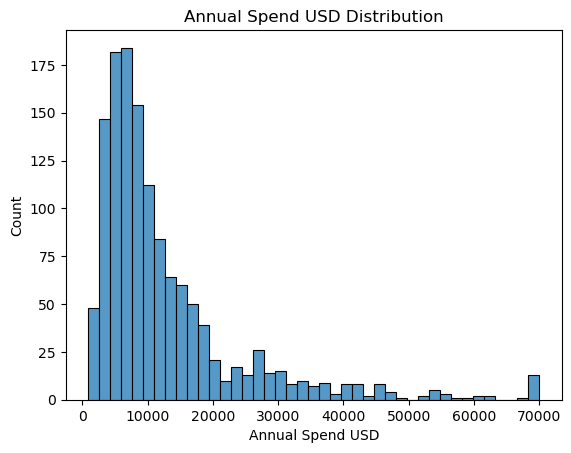

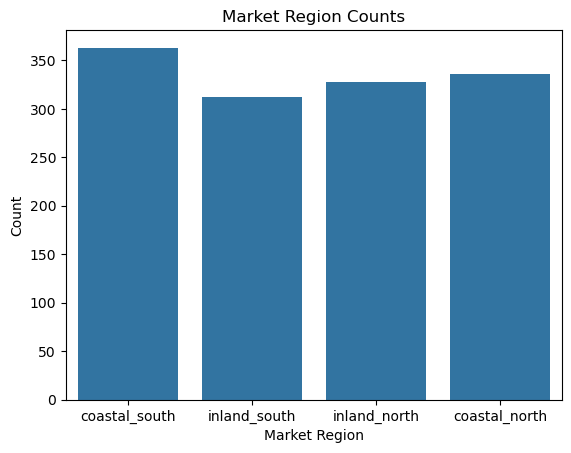

In [22]:
# annual_spend_usd - histogram
sns.histplot(df['annual_spend_usd'])
plt.xlabel('Annual Spend USD')
plt.ylabel('Count')
plt.title('Annual Spend USD Distribution')
plt.show()

# market_region - count plot
plt.clf()
sns.countplot(x="market_region", data=df)
plt.xlabel("Market Region")
plt.ylabel("Count")
plt.title("Market Region Counts")
plt.show()

## Parametric Statistical Testing

### Business question
Does the mean amount of annual spending vary across market regions?

### Variables
* Dependent (numeric): `annual_spend_usd`
* Independent (categorical): `market_region`

### Testing Method
A one-way ANOVA test was selected because the outcome variable (`annual_spend_usd`) is numeric and the research question compares the mean annual spending across two or more independent groups defined by one categorical variable (`market_region`). An ANOVA is the standard way of testing the mean of a variable across one or more groups.

### Hypotheses
* $H_0$: Mean annual spending is equal across market regions.
* $H_1$ : At least one market region's mean annual spending is different.

### ANOVA Code



In [21]:
coastal_south = df.loc[df["market_region"] == "coastal_south", "annual_spend_usd"].tolist()
inland_south = df.loc[df["market_region"] == "inland_south", "annual_spend_usd"].tolist()
inland_north = df.loc[df["market_region"] == "inland_north", "annual_spend_usd"].tolist()
coastal_north= df.loc[df["market_region"] == "coastal_north", "annual_spend_usd"].tolist()


result = f_oneway(coastal_south, inland_south, inland_north, coastal_north)

print("One-Way ANOVA (annual spending by region)")
print("statistic =", round(result.statistic, 4))
print("pvalue =", round(result.pvalue, 4))
print()

One-Way ANOVA (annual spending by region)
statistic = 2.8308
pvalue = 0.0373



### Results
The ANOVA yielded an F-statistic of `2.8308` with a p-value of `0.0373`. Since 0.0373 < 0.05, I reject the null hypothesis. There is statistically significant evidence that average annual spending differs by market region in this dataset.

### Recommendations
Because average annual spending varies by market region, the organization should consider market region as a potential factor in annual spending variation and investigate the reasons for the differences in averages. The organization can examine combinations of other variables in the dataset (e.g. customer age and gender) to see if any patterns emerge when combined with the market region that might identify opportunities to upsell or to target marketing campaigns.

### Limitations
One major limitation of this test is that ANOVA usually assumes normally distributed data. The data in this dataset are righ-skewed. Although ANOVA is the preferred testing method ofr data with three or more groups, further testing is needed in this case, as not all assumptions of the test have been met.

Another limitation is that the test does not identify which market region or regions differ from the others. Further analysis is needed to determine which regions have lower-than-average means.